# Segunda Parte de Leitura de Dados

## Erros de Encoding 

In [12]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_7.csv'

df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte

- O erro:
> <font color='red'>UnicodeDecodeError:</font> 'utf-8' codec can't decode byte 0xed in position 13: invalid continuation byte

é algum problema no encoding, o arquivo pode ter caracteres especiais que causam problema. Podemos lidar com isso usando o parâmetro encoding e passando para ele a string 'latin'



In [13]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_7.csv'

# leitura do arquivo
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';', encoding='latin')

# visualizando os dados
df.head()
df.info()

C:\Users\roger\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
0,1.88126,1.537479,0.940563,-2.999230,-0.072468,1.893723,0.881446,0.964647,-0.276399,-1.496493,0.0
1,-1.97813,-3.240341,-0.009310,0.285501,0.593812,3.047661,-0.590776,-0.450715,0.115248,2.702816,0.0
2,2.32136,2.316037,-0.590099,0.804856,1.187915,-1.800900,0.940504,0.773943,0.950260,-2.003088,0.0
3,-1.08939,0.422833,-0.473176,-0.076203,2.559301,-0.748199,-0.639371,0.918232,-3.388319,0.460759,0.0
4,1.36585,-1.306228,0.831554,-0.856721,2.744342,2.633980,-2.291543,-0.849595,-2.275565,3.422971,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 11 columns):
Feature_0    100003 non-null object
Feature_1    100000 non-null float64
Feature_2    100000 non-null float64
Feature_3    100000 non-null float64
Feature_4    100000 non-null float64
Feature_5    100000 non-null float64
Feature_6    100000 non-null float64
Feature_7    100000 non-null float64
Feature_8    100000 non-null float64
Feature_9    100000 non-null float64
Label        100000 non-null float64
dtypes: float64(10), object(1)
memory usage: 8.4+ MB


- Aparentemente não temos nenhum problema com os dados após usar os parâmetros, mas repare nos tipos de dados que o Pandas nos deu, você enxerga album problema neles?
- Temos um "warning", ou seja, um aviso que o Python nos dá sobre um possível problema, ele não é um erro, veja que o seu código rodou, ele é apenas um alerta sobre algum possível erro. Vamos fazer um print dele e verificar

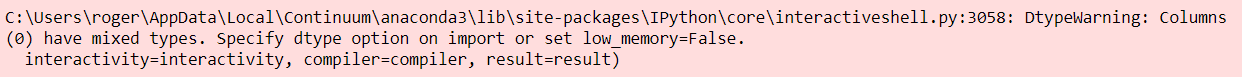

- O que importa aqui é a seguinte frase:
> DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False
- Esse aviso está dizendo que temos uma coluna com tipos de dados misturados. Perceba que pelo método info() a coluna Feature_0 é a única que está com o tipo **object**, que é do tipo texto, e a única com 3 valores a mais. Podemos resolver isso indicando para a função read_csv() quais os tipos das colunas ou usando o parâmetro low_memory=False, contudo isso pode causar problemas despercebidos. Nós devemos olhar e explorar os dados para ver o que aconteceu de fato.

**EXPLORANDO O PROBLEMA**
- Quando olhamos para o DataFrame com a ajuda do método .head(), percebemos que a coluna Feature_0 deveria ser numérica.
- Vamos olhar para as últimas linhas do DataFrame com o método .tail()

In [14]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_7.csv'

# leitura do arquivo
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';', encoding='latin')

# visualizando os dados
df.head()
df.tail()
df.info()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
0,1.88126,1.537479,0.940563,-2.999230,-0.072468,1.893723,0.881446,0.964647,-0.276399,-1.496493,0.0
1,-1.97813,-3.240341,-0.009310,0.285501,0.593812,3.047661,-0.590776,-0.450715,0.115248,2.702816,0.0
2,2.32136,2.316037,-0.590099,0.804856,1.187915,-1.800900,0.940504,0.773943,0.950260,-2.003088,0.0
3,-1.08939,0.422833,-0.473176,-0.076203,2.559301,-0.748199,-0.639371,0.918232,-3.388319,0.460759,0.0
4,1.36585,-1.306228,0.831554,-0.856721,2.744342,2.633980,-2.291543,-0.849595,-2.275565,3.422971,0.0


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
99998,1.4418571108985923,-2.478010,-0.497279,-0.996994,1.377048,3.328977,-1.105174,-0.290000,-1.904876,5.010785,0.0
99999,1.8836632960865647,0.472536,1.953987,1.938580,0.916625,-0.650950,-2.179061,0.421463,2.567276,-0.586038,0.0
100000,Rogério Guimarães de Campos Júnior - Cientista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Extraído no dia 04/12/2019 às 15h00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Permissão Completa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 11 columns):
Feature_0    100003 non-null object
Feature_1    100000 non-null float64
Feature_2    100000 non-null float64
Feature_3    100000 non-null float64
Feature_4    100000 non-null float64
Feature_5    100000 non-null float64
Feature_6    100000 non-null float64
Feature_7    100000 non-null float64
Feature_8    100000 non-null float64
Feature_9    100000 non-null float64
Label        100000 non-null float64
dtypes: float64(10), object(1)
memory usage: 8.4+ MB


- Muito claro que as últimas 3 linhas do DataFrame são textos de rodapé, vamos excluir essas linhas com o parâmetro skipfooter

In [15]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_7.csv'

# leitura do arquivo
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';', encoding='latin', skipfooter=3)

# visualizando os dados
df.head()
df.tail()
df.info()

C:\Users\roger\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
0,1.881258,1.537479,0.940563,-2.999230,-0.072468,1.893723,0.881446,0.964647,-0.276399,-1.496493,0
1,-1.978129,-3.240341,-0.009310,0.285501,0.593812,3.047661,-0.590776,-0.450715,0.115248,2.702816,0
2,2.321358,2.316037,-0.590099,0.804856,1.187915,-1.800900,0.940504,0.773943,0.950260,-2.003088,0
3,-1.089392,0.422833,-0.473176,-0.076203,2.559301,-0.748199,-0.639371,0.918232,-3.388319,0.460759,0
4,1.365850,-1.306228,0.831554,-0.856721,2.744342,2.633980,-2.291543,-0.849595,-2.275565,3.422971,0


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
99995,-1.445778,-0.912391,1.105496,0.114318,2.434590,1.232004,1.086964,0.033220,-1.512631,0.717690,0
99996,0.099034,-0.256040,0.080266,2.718100,0.957555,-1.104371,0.422892,0.714145,2.240274,-0.433634,0
99997,-3.511664,-0.670303,-0.653451,-0.199598,0.589263,0.162804,-0.748926,0.721085,-1.568139,-0.774164,0
99998,1.441857,-2.478010,-0.497279,-0.996994,1.377048,3.328977,-1.105174,-0.290000,-1.904876,5.010785,0
99999,1.883663,0.472536,1.953987,1.938580,0.916625,-0.650950,-2.179061,0.421463,2.567276,-0.586038,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
Feature_0    100000 non-null float64
Feature_1    100000 non-null float64
Feature_2    100000 non-null float64
Feature_3    100000 non-null float64
Feature_4    100000 non-null float64
Feature_5    100000 non-null float64
Feature_6    100000 non-null float64
Feature_7    100000 non-null float64
Feature_8    100000 non-null float64
Feature_9    100000 non-null float64
Label        100000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 8.4 MB


- 1º) Agora sim!! Temos todas as colunas com o mesmo tanto de linhas não vazias e todas com os tipos de dados aparentemente corretos.
- 2º) Recebemos mais um "warning" do Python, não tenha crises com isso, leia o texto e tente arrumar

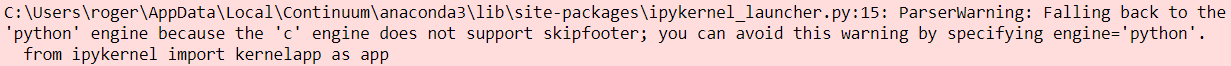

- Este aviso está dizendo que a engine 'c' não é compatível com o parâmetro skipfooter. Ele mesmo nos fala que podemos evitar isso usando o parâmetro engine='python'

In [17]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import bilbiotecas
import pandas as pd
import numpy as np

# variavel auxiliar para leitura dos dados
ender_arquivo = 'data_examples/dados_7.csv'

# leitura do arquivo
df = pd.read_csv(filepath_or_buffer=ender_arquivo, sep=';', encoding='latin', skipfooter=3, engine='python')

# visualizando os dados
df.head()
df.tail()
df.info()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
0,1.881258,1.537479,0.940563,-2.999230,-0.072468,1.893723,0.881446,0.964647,-0.276399,-1.496493,0
1,-1.978129,-3.240341,-0.009310,0.285501,0.593812,3.047661,-0.590776,-0.450715,0.115248,2.702816,0
2,2.321358,2.316037,-0.590099,0.804856,1.187915,-1.800900,0.940504,0.773943,0.950260,-2.003088,0
3,-1.089392,0.422833,-0.473176,-0.076203,2.559301,-0.748199,-0.639371,0.918232,-3.388319,0.460759,0
4,1.365850,-1.306228,0.831554,-0.856721,2.744342,2.633980,-2.291543,-0.849595,-2.275565,3.422971,0


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
99995,-1.445778,-0.912391,1.105496,0.114318,2.434590,1.232004,1.086964,0.033220,-1.512631,0.717690,0
99996,0.099034,-0.256040,0.080266,2.718100,0.957555,-1.104371,0.422892,0.714145,2.240274,-0.433634,0
99997,-3.511664,-0.670303,-0.653451,-0.199598,0.589263,0.162804,-0.748926,0.721085,-1.568139,-0.774164,0
99998,1.441857,-2.478010,-0.497279,-0.996994,1.377048,3.328977,-1.105174,-0.290000,-1.904876,5.010785,0
99999,1.883663,0.472536,1.953987,1.938580,0.916625,-0.650950,-2.179061,0.421463,2.567276,-0.586038,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
Feature_0    100000 non-null float64
Feature_1    100000 non-null float64
Feature_2    100000 non-null float64
Feature_3    100000 non-null float64
Feature_4    100000 non-null float64
Feature_5    100000 non-null float64
Feature_6    100000 non-null float64
Feature_7    100000 non-null float64
Feature_8    100000 non-null float64
Feature_9    100000 non-null float64
Label        100000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 8.4 MB


- PRONTO!!! Conseguimos resolver as questões desse arquivo chato